In [1]:
import numpy as np
import pandas as pd
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
train_dir_path = pathlib.Path('images/train/').absolute()
train_dir_path

PosixPath('/Users/app/Documents/Machine_Learning/opencv/images/train')

In [3]:
train_images_path = train_dir_path.glob('*/*.jpg')

In [4]:
train_images_path = list(train_images_path)

In [5]:
train_images_path[0]

PosixPath('/Users/app/Documents/Machine_Learning/opencv/images/train/happy/3578.jpg')

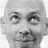

In [6]:
from PIL import Image
Image.open(train_images_path[1])

In [7]:
train_faces_dict = {
    'angry':list(train_dir_path.glob('angry/*')),
    'disgust':list(train_dir_path.glob('disgust/*')),
    'fear':list(train_dir_path.glob('fear/*')),
    'happy':list(train_dir_path.glob('happy/*')),
    'neutral':list(train_dir_path.glob('neutral/*')),
    'sad':list(train_dir_path.glob('sad/*')),
    'surprise':list(train_dir_path.glob('surprise/*'))
}

In [8]:
train_faces_dict['surprise'][0]

PosixPath('/Users/app/Documents/Machine_Learning/opencv/images/train/surprise/12536.jpg')

In [9]:
np.array(train_faces_dict['surprise']).shape

(3205,)

In [10]:
cv2.imread(str(train_faces_dict['surprise'][0])).shape

(48, 48, 3)

In [11]:
face_labels = {
    'angry':0,
    'disgust':1,
    'fear':2,
    'happy':3,
    'neutral':4,
    'sad':5,
    'surprise':6,
}

In [44]:
x = []
y = []
for emotion, faces in train_faces_dict.items():
    i=0
    for face in faces:
        f = cv2.imread(str(face))
        resized_img = cv2.resize(f,(224,224))
        x.append(resized_img)
        y.append(face_labels[emotion])
        i+=1
        if i==100:
            print(i)
            break
        

100
100
100
100
100
100
100


In [45]:
x=np.array(x)
y=np.array(y)

In [46]:
x.shape

(700, 224, 224, 3)

In [47]:
y.shape

(700,)

In [126]:
 emotion_names = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')
emotion_names[y[0]]

'angry'

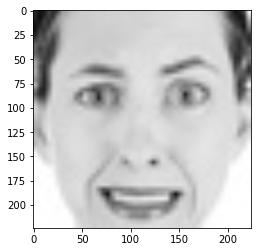

In [128]:
plt.imshow(x[200])

In [49]:
x = x/255

In [50]:
x[0].shape

(224, 224, 3)

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)



In [20]:
model.fit(x, y, epochs=5)

Epoch 1/5
22/22 [==============================] - 9s 354ms/step - loss: 12.8545 - accuracy: 0.1149
Epoch 2/5
22/22 [==============================] - 8s 353ms/step - loss: 1.9431 - accuracy: 0.1849
Epoch 3/5
22/22 [==============================] - 7s 338ms/step - loss: 1.9123 - accuracy: 0.2074
Epoch 4/5
22/22 [==============================] - 8s 342ms/step - loss: 1.7434 - accuracy: 0.4008
Epoch 5/5
22/22 [==============================] - 8s 342ms/step - loss: 1.4926 - accuracy: 0.4841


In [21]:
model.evaluate(x, y)

22/22 [==============================] - 2s 78ms/step - loss: 1.2460 - accuracy: 0.6171


[1.2459689378738403, 0.6171428561210632]

In [51]:
y_pred = model.predict(x)

In [58]:
y[3]

0

In [57]:
np.argmax(y_pred[3])

0

In [25]:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [26]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(7, activation='sigmoid')
])

In [27]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [28]:
model.fit(x, y, epochs=5)

Epoch 1/5
22/22 [==============================] - 11s 413ms/step - loss: 2.3354 - accuracy: 0.1422
Epoch 2/5
22/22 [==============================] - 9s 426ms/step - loss: 1.8873 - accuracy: 0.2487
Epoch 3/5
22/22 [==============================] - 10s 436ms/step - loss: 1.6988 - accuracy: 0.3509
Epoch 4/5
22/22 [==============================] - 13s 586ms/step - loss: 1.5387 - accuracy: 0.4322
Epoch 5/5
22/22 [==============================] - 13s 602ms/step - loss: 1.4457 - accuracy: 0.4809


In [29]:
model.evaluate(x, y)

22/22 [==============================] - 12s 508ms/step - loss: 1.4053 - accuracy: 0.4914


[1.4053243398666382, 0.49142858386039734]

In [63]:
y_pred = model.predict(x)

In [64]:
x

array([[[[0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294],
         ...,
         [0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686]],

        [[0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294],
         ...,
         [0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686]],

        [[0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294],
         [0.28235294, 0.28235294, 0.28235294],
         ...,
         [0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686],
         [0.19215686, 0.19215686, 0.19215686]],

        ...,

        [[0.09803922, 0.09803922, 0.09803922],
         [0.09803922, 0.09803922, 0.09803922]

In [68]:
y[4]

0

In [67]:
np.argmax(y_pred[4])


0

In [69]:
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [70]:
cap=cv2.VideoCapture(0)
ret, image=cap.read()
# print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
image = cv2.resize(image, (224, 224))
print(image.shape)
print(image)
cv2.imshow('graytobgr', image)
cv2.waitKey(0)
cap.release()
cv2.destroyAllWindows()

(224, 224, 3)
[[[57 57 57]
  [57 57 57]
  [55 55 55]
  ...
  [90 90 90]
  [90 90 90]
  [85 85 85]]

 [[58 58 58]
  [59 59 59]
  [54 54 54]
  ...
  [90 90 90]
  [91 91 91]
  [88 88 88]]

 [[58 58 58]
  [59 59 59]
  [56 56 56]
  ...
  [88 88 88]
  [88 88 88]
  [86 86 86]]

 ...

 [[ 5  5  5]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [ 7  7  7]
  [ 8  8  8]
  [ 7  7  7]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 4  4  4]
  ...
  [ 7  7  7]
  [ 7  7  7]
  [ 3  3  3]]

 [[ 1  1  1]
  [ 2  2  2]
  [ 4  4  4]
  ...
  [ 7  7  7]
  [10 10 10]
  [ 4  4  4]]]


In [2]:
from keras.models import load_model
model = load_model("./emotion_detector_models/model.hdf5")
# predicted_class = np.argmax(model.predict(face_image)

OSError: SavedModel file does not exist at: ./emotion_detector_models/model.hdf5/{saved_model.pbtxt|saved_model.pb}

In [131]:
cap = cv2.VideoCapture(0)

In [132]:
c = 0
while True:
    ret, image=cap.read()
#     print(image)
    gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_coor = face_classifier.detectMultiScale(gray_image, 1.3, 5)
    
    if len(face_coor)==0:
        continue;
    face_image=np.array(0)
    for (X,Y,W,H) in face_coor:
#         cv2.rectangle(test_image,(x,y), (x+w,y+h), (255,0,0))
        face_image=gray_image[Y:Y+W,X:X+H]
    face_image=cv2.resize(face_image,(224, 224))
#     image_pixels = image.image_to_array(roi_gray)
#     image_pixels = np.expand_dims(image_pixels, axis = 0)
#     image_pixels /= 255
    face_image = cv2.cvtColor(face_image, cv2.COLOR_GRAY2BGR)
#     cv2.imshow('face', face_image)
   
    face_image=face_image/255
    print(face_image.shape)
    print(np.array([face_image]).shape)
    prediction = model.predict(np.array([face_image]))
    print(np.argmax(prediction[0]))

    emotion_names = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')
    emotion = emotion_names[np.argmax(prediction[0])]


#     cv2.putText(test_image, emotion_prediction, (int(x), int(y)))
#     cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)  
    cv2.putText(gray_image, emotion, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

    resized_image = cv2.resize(gray_image, (1000, 700))
    cv2.imshow('Emotion',resized_image)
    c+=1
    if cv2.waitKey(1) == 13 or c==500:
        break


cap.release()
cv2.destroyAllWindows

(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
6
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
2
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
3
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224,

(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
3
(224, 224, 3)
(1, 224, 224, 3)
2
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
3
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
2
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
2
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
1
(224, 224, 3)
(1, 224, 224, 3)
4
(224, 224, 3)
(1, 224, 224, 3)
6
(224, 224, 3)
(1, 224, 224, 3)
5
(224, 224, 3)
(1, 224, 224, 3)
6
(224, 224,

4
(224, 224, 3)
(1, 224, 224, 3)
4


<function destroyAllWindows>

In [103]:
cap.release()